In [39]:
# ! pip install opencv-python
# ! pip install matplotlib
# ! pip install mediapy

In [40]:
import cv2 as cv
import numpy as np
import random
import sys
from numpy.random import randint
import mediapy as mpy
import matplotlib.pyplot as plt

In [41]:
def display_image(window_name, img):
    """
    Displays image with given window name.
    :param window_name: name of the window
    :param img: image object to display
    """
    mpy.show_image(img)

In [42]:
img_path = "./bonn.png"

""

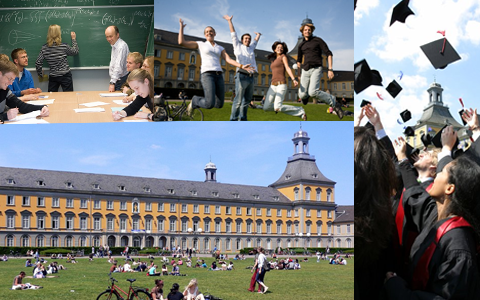

In [43]:
# 2a: read and display the image
img = cv.imread(img_path, cv.IMREAD_COLOR)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
display_image('2 - a - Original Image', img)


""

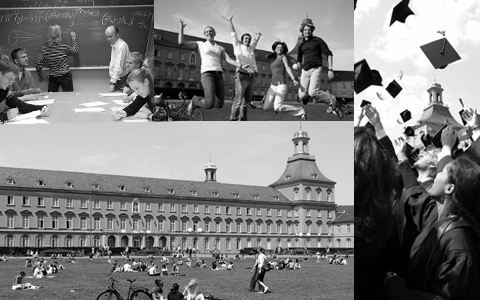

In [44]:
# 2b: display the intensity image
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
display_image('2 - b - Intensity Image', img_gray)

""

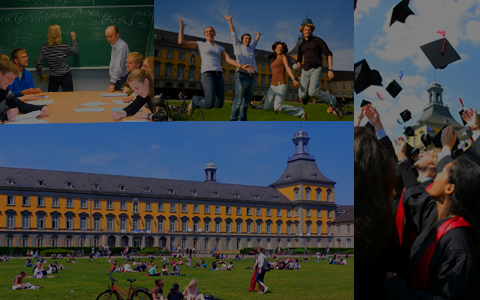

In [45]:
# 2c: for loop to perform the operation
img_cpy = img.copy()
height, width = img_cpy.shape[:2]

# Going through the pixels
for x in range(height):
    for y in range(width):
        for c in range(3):
            img_cpy[x, y, c] = max(0, img_cpy[x, y, c] - 0.5 * img_gray[x, y])

display_image('2 - c - Reduced Intensity Image', img_cpy)


In [51]:

# 2d: one-line statement to perfom the operation above
#  - add a channels' dimension to the 0.5 * gray_image,
#  - subtract from original image and clip for non-negativity
#  - set the type for the mat to np.uint8
img_cpy = (img - np.expand_dims(img_gray * 0.5, axis=2)).clip(min=0).astype(np.uint8)

# display_image('2 - d - Reduced Intensity Image One-Liner', img_cpy)

img_gray[:,:, None].shape

(300, 480, 1)

In [47]:
# 2e: Extract the center patch and place randomly in the image
img_cpy = img.copy()

img_patch = img_cpy[(height - 16) // 2: (height + 16) // 2,
            (width - 16) // 2: (width + 16) // 2]
display_image('2 - e - Center Patch', img_patch)

""


""

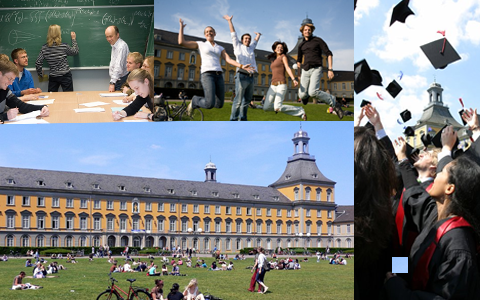

In [48]:
# Random location of the patch for placement
rand_coord = [randint(0, height - 32), randint(0, width - 32)]

# Adding patch to original image
img_cpy[rand_coord[0]: rand_coord[0] + 16, rand_coord[1]: rand_coord[1] + 16] = img_patch
display_image('2 - e - Center Patch Placed Random %d, %d' % (rand_coord[0], rand_coord[1]), img_cpy)

""

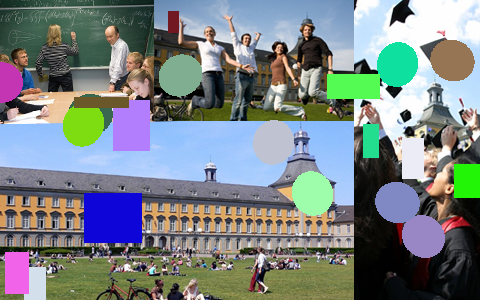

In [49]:
# 2f: Draw random rectangles and ellipses
img_cpy = img.copy()

# random x, y, sizes, colors of rect and ellipses
rand_properties = np.array([randint(0, width, 20), randint(0, height, 20),
                            randint(10, 60, 20), randint(10, 80, 20),
                            randint(0, 255, 20), randint(0, 255, 20), randint(0, 255, 20),
                            randint(0, 360, 20)]).astype(np.uint16)

for i in range(0, 10):
    # adding rectangles
    index = i * 2

    x, y = rand_properties[0, index], rand_properties[1, index]

    rect_end_coords = (x + rand_properties[2, index], y + rand_properties[3, index])

    rect_color = (int(rand_properties[4, index]), int(rand_properties[5, index]), int(rand_properties[6, index]))

    cv.rectangle(img_cpy, (x, y), rect_end_coords, rect_color, -1)

    # adding ellipses
    index = i * 2 + 1

    x, y = rand_properties[0, index], rand_properties[1, index]

    ellipse_color = (int(rand_properties[4, index]), int(rand_properties[5, index]), int(rand_properties[6, index]))

    cv.ellipse(img_cpy, (x, y), (20, 22), rand_properties[7, i * 2 + 1], 0, 360, ellipse_color, -1)
    # pass

display_image('2 - f - Rectangles and Ellipses', img_cpy)
